In [1]:
import pandas as pd

# Define the path to the CSV file
csv_path_appliance = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/appliance.csv"

# Load the CSV file into a DataFrame
df_appliance = pd.read_csv(csv_path_appliance)

# Display the first few rows of the DataFrame
print(df_appliance.head())


   applianceid  homeid  roomid applianceclass powertype  appliancetype  \
0          907      47     650           food       gas         gashob   
1          908      47     650           food  electric  fridgefreezer   
2          909      47     650           food  electric          grill   
3          910      47     650           food  electric        toaster   
4          911      47     650           food  electric         kettle   

        appliancesubtype  number  
0         gasCookingHobs       4  
1  combinedFridgeFreezer       1  
2                  grill       1  
3                toaster       1  
4                 kettle       1  


In [2]:
df_appliance['applianceclass'].unique()

array(['food', 'water', 'heating', 'other'], dtype=object)

In [3]:
zero_appliance_rows = df_appliance[df_appliance['powertype'].isnull()]
homeids_with_zero_appliance = zero_appliance_rows['homeid']
homeids_with_zero_appliance

981     149
1173    159
Name: homeid, dtype: int64

In [4]:
df_appliance['powertype'].unique()

array(['gas', 'electric', 'other_fuel', nan], dtype=object)

In [5]:
df_appliance['appliancetype'].unique()

array(['gashob', 'fridgefreezer', 'grill', 'toaster', 'kettle',
       'electricoven', 'washingmachine', 'sink', 'shower', 'bath',
       'freezer', 'fridge', 'microwave', 'dishwasher', 'gasfire',
       'vacuumcleaner', 'gasoven', 'electrichob',
       'washingmachinetumbledrier', 'electricshower', 'electricheater',
       'tumbledrier', 'woodburningstove', 'dehumidifier', 'other'],
      dtype=object)

In [6]:
df_appliance.shape

(3440, 8)

In [42]:
# Define the path to the CSV file
csv_path_home = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/home.csv"

# Load the CSV file into a DataFrame
df_home = pd.read_csv(csv_path_home)

# Display the first few rows of the DataFrame
df_home.head()

,homeid,install_type,location,residents,starttime,starttime_enhanced,endtime,cohortid,income_band,study_class,...,urban_rural_name,build_era,new_build_year,smart_monitors,smart_automation,occupied_days,occupied_nights,entry_floor,outdoor_space,outdoor_drying
0,47,standard,Edinburgh,2,10/08/2016 00:00,NaN,08/05/2017 09:00,treatment_20170315,Missing,treatment,...,Large Urban Areas,1900-1918,NaN,Don't own,Don't own,2,7,3rd,No,NaN
1,59,standard,Edinburgh,2,06/10/2016 00:00,NaN,28/01/2018 07:56,control_20170315,"£90,000 or more",control,...,Large Urban Areas,1900-1918,NaN,Don't own,Don't own,3,7,Ground,Yes - shared with neighbours,Yes
2,61,enhanced,Edinburgh,2,06/10/2016 00:00,17/11/2016 00:00,19/10/2017 07:00,enhanced_20170213,"£48,600 to £53,999",enhanced,...,Large Urban Areas,1919-1930,NaN,Don't own,Don't own,2,7,Ground,Yes - shared with neighbours,Yes
3,62,enhanced,Edinburgh,2,26/08/2016 00:00,11/10/2016 00:00,30/06/2018 22:59,enhanced_20170213,"£43,200 to £48,599",enhanced,...,Large Urban Areas,1850-1899,NaN,Don't own,Don't own,1,7,2nd,Yes - shared with neighbours,Yes
4,64,standard,Edinburgh,4,20/10/2016 00:00,NaN,30/06/2018 22:59,treatment_20170315,"£66,000 to £77,999",treatment,...,Large Urban Areas,Before 1850,NaN,Don't own,Don't own,6,7,1st,Yes - shared with neighbours,Yes


In [8]:
df_home['entry_floor'].unique()

array(['3rd', 'Ground', '2nd', '1st', '4th', 'Basement (level -1)', '5th',
       'Attic'], dtype=object)

In [9]:
floor_mapping = {
    'Basement (level -1)': -1,
    'Ground': 0,
    '1st': 1,
    '2nd': 2,
    '3rd': 3,
    '4th': 4,
    '5th': 5,
    'Attic': 6
}

# Replace the floor values into numbers
df_home['entry_floor'] = df_home['entry_floor'].replace(floor_mapping)

/tmp/ipykernel_211620/2570490203.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_home['entry_floor'] = df_home['entry_floor'].replace(floor_mapping)


In [10]:
df_home['entry_floor']

0      3
1      0
2      0
3      2
4      1
      ..
250    0
251    0
252    0
253    0
254    1
Name: entry_floor, Length: 255, dtype: int64

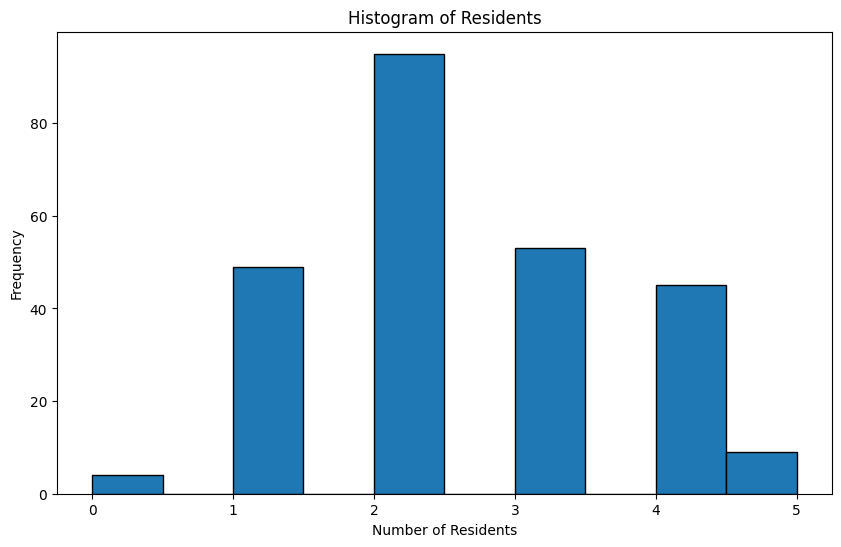

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 6))
plt.hist(df_home['residents'], bins=10, edgecolor='black')
plt.title('Histogram of Residents')
plt.xlabel('Number of Residents')
plt.ylabel('Frequency')
plt.show()

In [12]:
#search the homeid for 0 residentes
zero_residents_rows = df_home[df_home['residents'] == 0]
homeids_with_zero_residents = zero_residents_rows['homeid']
homeids_with_zero_residents

96     171
142    219
150    228
195    271
Name: homeid, dtype: int64

In [13]:
# Step 1: Identify Unique Income Bands and Create Mapping
unique_income_bands = df_home['income_band'].unique()
income_band_mapping = {band: i for i, band in enumerate(unique_income_bands)}

# Replace 'income_band' with numerical values
df_home['income_band_num'] = df_home['income_band'].map(income_band_mapping)

print("Income Band Mapping:", income_band_mapping)
display(df_home)

Income Band Mapping: {'Missing': 0, '£90,000 or more': 1, '£48,600 to £53,999': 2, '£43,200 to £48,599': 3, '£66,000 to £77,999': 4, '£54,000 to £65,999': 5, '£27,000 to £32,399': 6, 'less than £10,800': 7, '£37,800 to £43,199': 8, '£23,400 to £26,999': 9, '£16,200 to £19,799': 10, '£32,400 to £37,799': 11, '£78,000 to £89,999': 12, '£13,500 to £16,199': 13, '£10,800 to £13,499': 14, '£19,800 to £23,399': 15}


,homeid,install_type,location,residents,starttime,starttime_enhanced,endtime,cohortid,income_band,study_class,...,build_era,new_build_year,smart_monitors,smart_automation,occupied_days,occupied_nights,entry_floor,outdoor_space,outdoor_drying,income_band_num
0,47,standard,Edinburgh,2,10/08/2016 00:00,NaN,08/05/2017 09:00,treatment_20170315,Missing,treatment,...,1900-1918,NaN,Don't own,Don't own,2,7,3,No,NaN,0
1,59,standard,Edinburgh,2,06/10/2016 00:00,NaN,28/01/2018 07:56,control_20170315,"£90,000 or more",control,...,1900-1918,NaN,Don't own,Don't own,3,7,0,Yes - shared with neighbours,Yes,1
2,61,enhanced,Edinburgh,2,06/10/2016 00:00,17/11/2016 00:00,19/10/2017 07:00,enhanced_20170213,"£48,600 to £53,999",enhanced,...,1919-1930,NaN,Don't own,Don't own,2,7,0,Yes - shared with neighbours,Yes,2
3,62,enhanced,Edinburgh,2,26/08/2016 00:00,11/10/2016 00:00,30/06/2018 22:59,enhanced_20170213,"£43,200 to £48,599",enhanced,...,1850-1899,NaN,Don't own,Don't own,1,7,2,Yes - shared with neighbours,Yes,3
4,64,standard,Edinburgh,4,20/10/2016 00:00,NaN,30/06/2018 22:59,treatment_20170315,"£66,000 to £77,999",treatment,...,Before 1850,NaN,Don't own,Don't own,6,7,1,Yes - shared with neighbours,Yes,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,331,standard,Fife,2,12/04/2018 11:57,NaN,30/06/2018 22:59,treatment_20180514,"£54,000 to £65,999",treatment,...,1965-1980,NaN,Don't own,Don't own,7,7,0,Yes - private,Yes,5
251,332,standard,Edinburgh,1,19/04/2018 09:14,NaN,30/06/2018 22:59,treatment_20180514,"£32,400 to £37,799",treatment,...,1919-1930,NaN,Don't own,Don't own,2,7,0,Yes - private,Yes,11
252,334,standard,Edinburgh,5,30/04/2018 07:14,NaN,30/06/2018 22:59,control_20180514,"less than £10,800",control,...,1850-1899,NaN,Don't own,Don't own,4,7,0,Yes - shared with neighbours,Yes,7
253,335,standard,EastLothian,4,30/04/2018 13:42,NaN,30/06/2018 22:59,treatment_20180514,"£78,000 to £89,999",treatment,...,1991-1995,NaN,Don't own,Don't own,2,7,0,Yes - private,Yes,12


In [14]:
# Transform 'starttime' column to datetime
df_home['starttime'] = pd.to_datetime(df_home['starttime'], format='%d/%m/%Y %H:%M')

# Create new columns for start date and time
df_home['start_date'] = pd.to_datetime(df_home['starttime'].dt.date)
df_home['start_time'] = df_home['starttime'].dt.time

# Transform 'endtime' column to datetime
df_home['endtime'] = pd.to_datetime(df_home['endtime'], format='%d/%m/%Y %H:%M')

# Create new columns for end date and time
df_home['end_date'] = df_home['endtime'].dt.date
df_home['end_time'] = df_home['endtime'].dt.time

df_home['start_date'] = pd.to_datetime(df_home['start_date'])
df_home['end_date'] = pd.to_datetime(df_home['end_date'])


In [15]:
df_home.dtypes

homeid                         int64
install_type                  object
location                      object
residents                      int64
starttime             datetime64[ns]
starttime_enhanced            object
endtime               datetime64[ns]
cohortid                      object
income_band                   object
study_class                   object
hometype                      object
equivalised_income            object
occupancy                     object
urban_rural_class             object
urban_rural_name              object
build_era                     object
new_build_year               float64
smart_monitors                object
smart_automation              object
occupied_days                  int64
occupied_nights                int64
entry_floor                    int64
outdoor_space                 object
outdoor_drying                object
income_band_num                int64
start_date            datetime64[ns]
start_time                    object
e

In [16]:
df_home['days_between'] = (df_home['end_date'] - df_home['start_date']).dt.days
df_home

,homeid,install_type,location,residents,starttime,starttime_enhanced,endtime,cohortid,income_band,study_class,...,occupied_nights,entry_floor,outdoor_space,outdoor_drying,income_band_num,start_date,start_time,end_date,end_time,days_between
0,47,standard,Edinburgh,2,2016-08-10 00:00:00,NaN,2017-05-08 09:00:00,treatment_20170315,Missing,treatment,...,7,3,No,NaN,0,2016-08-10,00:00:00,2017-05-08,09:00:00,271
1,59,standard,Edinburgh,2,2016-10-06 00:00:00,NaN,2018-01-28 07:56:00,control_20170315,"£90,000 or more",control,...,7,0,Yes - shared with neighbours,Yes,1,2016-10-06,00:00:00,2018-01-28,07:56:00,479
2,61,enhanced,Edinburgh,2,2016-10-06 00:00:00,17/11/2016 00:00,2017-10-19 07:00:00,enhanced_20170213,"£48,600 to £53,999",enhanced,...,7,0,Yes - shared with neighbours,Yes,2,2016-10-06,00:00:00,2017-10-19,07:00:00,378
3,62,enhanced,Edinburgh,2,2016-08-26 00:00:00,11/10/2016 00:00,2018-06-30 22:59:00,enhanced_20170213,"£43,200 to £48,599",enhanced,...,7,2,Yes - shared with neighbours,Yes,3,2016-08-26,00:00:00,2018-06-30,22:59:00,673
4,64,standard,Edinburgh,4,2016-10-20 00:00:00,NaN,2018-06-30 22:59:00,treatment_20170315,"£66,000 to £77,999",treatment,...,7,1,Yes - shared with neighbours,Yes,4,2016-10-20,00:00:00,2018-06-30,22:59:00,618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,331,standard,Fife,2,2018-04-12 11:57:00,NaN,2018-06-30 22:59:00,treatment_20180514,"£54,000 to £65,999",treatment,...,7,0,Yes - private,Yes,5,2018-04-12,11:57:00,2018-06-30,22:59:00,79
251,332,standard,Edinburgh,1,2018-04-19 09:14:00,NaN,2018-06-30 22:59:00,treatment_20180514,"£32,400 to £37,799",treatment,...,7,0,Yes - private,Yes,11,2018-04-19,09:14:00,2018-06-30,22:59:00,72
252,334,standard,Edinburgh,5,2018-04-30 07:14:00,NaN,2018-06-30 22:59:00,control_20180514,"less than £10,800",control,...,7,0,Yes - shared with neighbours,Yes,7,2018-04-30,07:14:00,2018-06-30,22:59:00,61
253,335,standard,EastLothian,4,2018-04-30 13:42:00,NaN,2018-06-30 22:59:00,treatment_20180514,"£78,000 to £89,999",treatment,...,7,0,Yes - private,Yes,12,2018-04-30,13:42:00,2018-06-30,22:59:00,61


In [17]:
#df_home = pd.set_option('display.max_columns', None)
#df_home

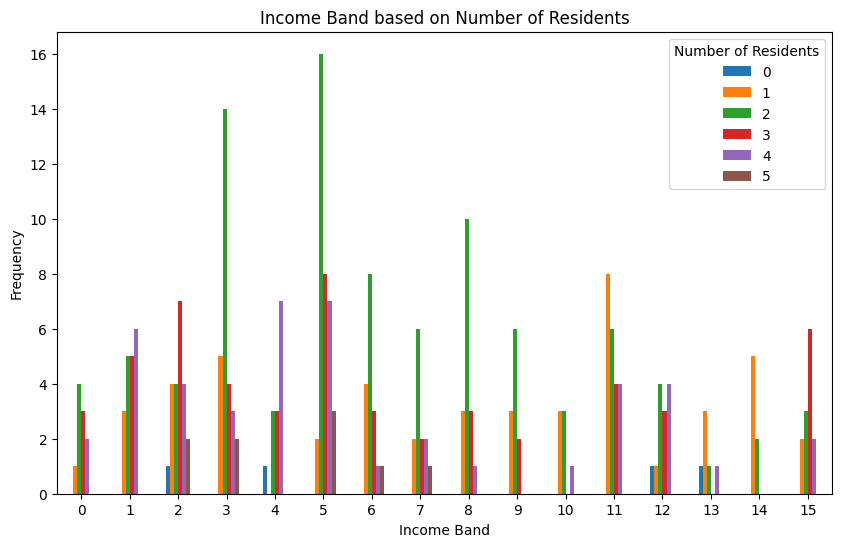

In [18]:
# Create a crosstab of 'income_band' and 'residents'
crosstab = pd.crosstab(df_home['income_band_num'], df_home['residents'])

# Plotting the crosstab as a bar plot using seaborn for better aesthetics
crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Income Band based on Number of Residents')
plt.xlabel('Income Band')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Number of Residents')
plt.show()

In [19]:
# Define the path to the CSV file
csv_path_loc = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/location.csv"

# Load the CSV file into a DataFrame
df_location = pd.read_csv(csv_path_loc)

# Display the first few rows of the DataFrame
df_location

,locationid,weather_centre
0,Edinburgh,Edinburgh
1,WestLothian,Livingston
2,Midlothian,Penicuik
3,EastLothian,North Berwick
4,Fife,Kirkcaldy


In [38]:
csv_path_reading = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/meterreading.csv"

# Load the CSV file into a DataFrame
df_reading = pd.read_csv(csv_path_reading)

# Display the first few rows of the DataFrame
df_reading


,homeid,provenance,provenancedetail,energytype,date,reading
0,77,technician,repair_visit,electricity,2018-01-16,30561.0
1,77,technician,repair_visit,gas,2018-01-16,8081.0
2,79,technician,repair_visit,electricity,2018-01-16,28822.0
3,79,technician,repair_visit,gas,2018-01-16,5152.0
4,96,technician,repair_visit,electricity,2018-01-15,18532.0
...,...,...,...,...,...,...
741,329,1311,all_web_end,gas,2018-06-08,3411.0
742,331,1324,all_web_end,electricity,2018-06-05,52596.0
743,331,1324,all_web_end,gas,2018-06-05,22526.0
744,335,1336,all_web_end,electricity,2018-06-05,20232.0


In [21]:
df_reading['energytype'].unique()

array(['electricity', 'gas'], dtype=object)

In [22]:
df_reading[df_reading['homeid'] == 77]

,homeid,provenance,provenancedetail,energytype,date,reading
0,77,technician,repair_visit,electricity,2018-01-16,30561.0
1,77,technician,repair_visit,gas,2018-01-16,8081.0


In [40]:
reading_sum = df_reading.groupby('homeid')['reading'].sum().reset_index()
reading_sum

,homeid,reading
0,62,50034.0
1,63,17084.0
2,65,58710.0
3,66,228526.0
4,70,11232.0
...,...,...
223,331,150022.0
224,332,14308.0
225,333,39349.0
226,334,21547.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd3f1705ae0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3f1706020>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd3f1705840>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3f1706560>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3f1706800>],
 'means': []}

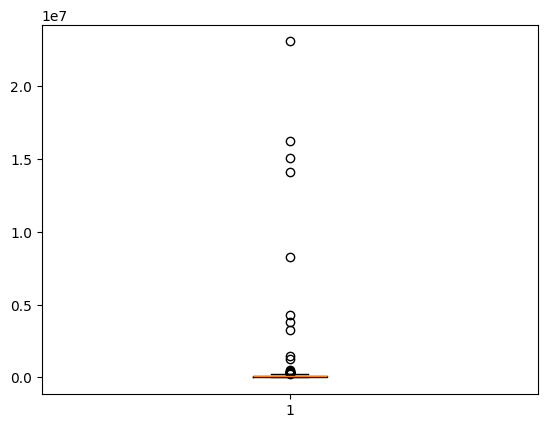

In [41]:
plt.boxplot(reading_sum['reading'])

In [24]:
csv_path_other_app = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/other_appliance.csv"

# Load the CSV file into a DataFrame
df_oth_app = pd.read_csv(csv_path_other_app)

# Display the first few rows of the DataFrame
print(df_oth_app.head())

   otherapplianceid  homeid                 appliance_name number
0                 1     113  outdoor_electric_space_heater      1
1                 2     126       outdoor_gas_space_heater      2
2                 3     306       outdoor_gas_space_heater      2
3                 4     168                outdoor_hot_tub      1
4                 5      89          outdoor_water_feature      1


In [25]:
csv_path_person = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/person.csv"

# Load the CSV file into a DataFrame
df_person = pd.read_csv(csv_path_person)

# Display the first few rows of the DataFrame
print(df_person.head())

   personid  homeid  primaryparticipant  \
0       617      47                   1   
1       618      47                   0   
2       621      59                   1   
3       622      59                   0   
4      1047      59                   0   

                                   relationtoprimary  gender ageband  \
0                                                NaN  Female   25-29   
1                           Husband, wife or partner    Male   20-24   
2                                                NaN    Male   30-34   
3                           Husband, wife or partner  Female   30-34   
4  Son or daughter, inc. adopted, step, foster an...     NaN     0-4   

  workingstatus weeklyhoursofwork  \
0     Paid work             31-40   
1     Paid work             41-50   
2     Paid work             31-40   
3     Paid work             41-50   
4           NaN               NaN   

                                           education  ageleavingeducation  \
0  Degre

In [26]:
csv_path_room = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/room.csv"

# Load the CSV file into a DataFrame
df_room = pd.read_csv(csv_path_room)

# Display the first few rows of the DataFrame
print(df_room.head())

   roomid  homeid        type secondarytype  storey  externalwindows  \
0     650      47     kitchen           NaN       3                1   
1     651      47  livingroom           NaN       3                1   
2     652      47    bathroom           NaN       3                0   
3     653      47     bedroom           NaN       3                1   
4     654      47        hall           NaN       3                0   

   externaldoors  externalwalls  floorarea  height  ...  trvs clothesdrying  \
0              0              1         55     290  ...   NaN         never   
1              0              1        172     290  ...   NaN     sometimes   
2              0              0         41     210  ...   NaN         never   
3              0              1        130     190  ...   NaN         never   
4              0              0         29     190  ...   NaN         never   

  windowsopen  thermostat  othertype stairup  stairupdoor  stairdown  \
0           1       

In [27]:
df_room['total_area'] =  df_room.groupby('homeid')['floorarea'].transform('sum')

In [28]:
df_room


,roomid,homeid,type,secondarytype,storey,externalwindows,externaldoors,externalwalls,floorarea,height,...,clothesdrying,windowsopen,thermostat,othertype,stairup,stairupdoor,stairdown,stairdowndoor,mezzanine,total_area
0,650,47,kitchen,NaN,3,1,0,1,55,290,...,never,1,0,NaN,0,0.0,0,0.0,0,427
1,651,47,livingroom,NaN,3,1,0,1,172,290,...,sometimes,1,0,NaN,0,0.0,0,0.0,0,427
2,652,47,bathroom,NaN,3,0,0,0,41,210,...,never,0,0,NaN,0,0.0,0,0.0,0,427
3,653,47,bedroom,NaN,3,1,0,1,130,190,...,never,1,0,NaN,0,0.0,0,0.0,0,427
4,654,47,hall,NaN,3,0,0,0,29,190,...,never,0,1,NaN,0,0.0,0,0.0,0,427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,3040,335,bathroom,NaN,1,1,0,1,65,229,...,never,1,0,NaN,0,0.0,0,0.0,0,1120
2172,3041,335,bedroom,NaN,1,1,0,2,100,229,...,never,1,0,NaN,0,0.0,0,0.0,0,1120
2173,3042,335,bedroom,NaN,1,1,0,2,100,229,...,never,1,0,NaN,0,0.0,0,0.0,0,1120
2174,3043,335,bedroom,NaN,1,1,0,2,115,229,...,never,1,0,NaN,0,0.0,0,0.0,0,1120


In [29]:
df_room.groupby(['homeid', 'type']).count()

roomid  secondarytype  storey  externalwindows  \
homeid type                                                         
47     bathroom         1              0       1                1   
       bedroom          1              0       1                1   
       hall             1              0       1                1   
       kitchen          1              0       1                1   
       livingroom       1              0       1                1   
...                   ...            ...     ...              ...   
335    hall             2              0       2                2   
       kitchen          1              0       1                1   
       livingroom       1              0       1                1   
       playroom         1              0       1                1   
       utility          1              0       1                1   

                   externaldoors  externalwalls  floorarea  height  radiators  \
homeid type                                                                     
47     bathroom                1              1          1       1          1   
       bedroom                 1              1          1       1          1   
       hall                    1              1          1       1          1   
       kitchen                 1              1          1       1          1   
       livingroom              1              1          1       1          1   
...                          ...            ...        ...     ...        ...   
335    hall                    2              2          2       2          2   
       kitchen                 1              1          1       1          1   
       livingroom              1              1          1       1          1   
       playroom                1              1          1       1          1   
       utility                 1              1          1       1          1   

                   trvs  clothesdrying  windowsopen  thermostat  othertype  \
homeid type                                                                  
47     bathroom       0              1            1           1          0   
       bedroom        0              1            1           1          0   
       hall           0              1            1           1          0   
       kitchen        0              1            1           1          0   
       livingroom     0              1            1           1          0   
...                 ...            ...          ...         ...        ...   
335    hall           0              2            2           2          0   
       kitchen        0              1            1           1          0   
       livingroom     1              1            1           1          0   
       playroom       1              1            1           1          0   
       utility        0              1            1           1          0   

                   stairup  stairupdoor  stairdown  stairdowndoor  mezzanine  \
homeid type                                                                    
47     bathroom          1            1          1              1          1   
       bedroom           1            1          1              1          1   
       hall              1            1          1              1          1   
       kitchen           1            1          1              1          1   
       livingroom        1            1          1              1          1   
...                    ...          ...        ...            ...        ...   
335    hall              2            2          2              2          2   
       kitchen           1            1          1              1          1   
       livingroom        1            1          1              1          1   
       playroom          1            1          1              1          1   
       utility           1            1          1              1          1   

           

In [30]:
unique_types_per_roomid = df_room.groupby('roomid')['type'].unique()

display(unique_types_per_roomid)

roomid
650        [kitchen]
651     [livingroom]
652       [bathroom]
653        [bedroom]
654           [hall]
            ...     
3044       [utility]
3046       [utility]
3047       [utility]
3070       [utility]
3071       [utility]
Name: type, Length: 2176, dtype: object

In [31]:
csv_path_sensor = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/sensor.csv"    

# Load the CSV file into a DataFrame
df_sensor = pd.read_csv(csv_path_sensor)

# Display the first few rows of the DataFrame
print(df_sensor.head())

   sensorid      sensorboxid         type   unit  status  roomid  \
0      1174  279492261292874        light  0.1cd  active     650   
1      1175  279492261292874     humidity   0.1%  active     650   
2      1176  279492261292874  temperature   0.1C  active     650   
3      1177  279492261292874      battery  0.01V  active     650   
4      1178  279492261292874      battery  0.01V  active     650   

  subcircuit_type  scalingfactor rawunit  counter  
0             NaN            1.0     NaN        1  
1             NaN            1.0     NaN        1  
2             NaN            1.0     NaN        1  
3             NaN            1.0     NaN        1  
4             NaN            1.0     NaN        2  


In [32]:
df_sensor.shape

(20081, 10)

In [33]:
csv_path_sensorbox = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/sensorbox.csv"     

# Load the CSV file into a DataFrame
df_sensorbox = pd.read_csv(csv_path_sensorbox)

# Display the first few rows of the DataFrame
print(df_sensorbox.head())

       sensorboxid  local_id  roomid  status sensorbox_type         notes  \
0  279492261292874         1     650  active           room  Behind door.   
1  279492261292875         2     650  active          clamp           NaN   
2  279492261292876         3     650  active          clamp           NaN   
3  279492261292877         4     651  active           room           NaN   
4  279492261292878         5     652  active           room           NaN   

   heightfromfloor name  onMainThermostat  temperatureInaccuracy  ...  \
0              157  NaN                 0                      0  ...   
1                0  NaN                 0                      0  ...   
2                0  NaN                 0                      0  ...   
3              161  NaN                 0                      0  ...   
4              158  NaN                 0                      0  ...   

   clamp1pipe  clamp2pipe gasblock installtime applianceid hasTRV  \
0         NaN         NaN    

In [34]:
df_sensorbox.shape

(4033, 24)

In [35]:
csv_path_tariff = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/tariff.csv"      

# Load the CSV file into a DataFrame
df_tariff = pd.read_csv(csv_path_tariff)

# Display the first few rows of the DataFrame
print(df_tariff.head())

   homeid notification_date            provenancedetail   energytype  \
0     167        2016-08-25  primary_facetoface_initial  electricity   
1      62        2016-08-26  primary_facetoface_initial  electricity   
2      62        2016-08-26  primary_facetoface_initial          gas   
3      61        2016-10-06  primary_facetoface_initial  electricity   
4      61        2016-10-06  primary_facetoface_initial          gas   

   daily_standing_charge_pence  unit_charge_pence_per_kwh  
0                        23.02                        NaN  
1                        31.31                        NaN  
2                        24.74                        NaN  
3                         0.33                       0.12  
4                         0.30                       0.33  


In [36]:
csv_path_weatherfeed = "/mnt/c/Users/Usuario/OneDrive/Projeto energypricing/metadata_and_surveys/metadata/weatherfeed.csv"      

# Load the CSV file into a DataFrame
df_weatherfeed = pd.read_csv(csv_path_weatherfeed)

# Display the first few rows of the DataFrame
df_weatherfeed.head()

,feedid,weather_type,locationid,unit,source,url
0,1,temperature,Edinburgh,0.1C,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...
1,2,conditions,Edinburgh,text,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...
2,3,humidity,Edinburgh,0.1%,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...
3,4,windspeed,Edinburgh,0.1kph,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...
4,5,winddirection,Edinburgh,NaN,Weather Underground (https://www.wunderground....,http://api.wunderground.com/api/2ade142c965f01...


In [37]:
df_weatherfeed.shape

(25, 6)